In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=['Serial No.'], inplace = True)

In [10]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [11]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [12]:
X, y

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 0          337          118                  4  4.5   4.5  9.65         1
 1          324          107                  4  4.0   4.5  8.87         1
 2          316          104                  3  3.0   3.5  8.00         1
 3          322          110                  3  3.5   2.5  8.67         1
 4          314          103                  2  2.0   3.0  8.21         0
 ..         ...          ...                ...  ...   ...   ...       ...
 395        324          110                  3  3.5   3.5  9.04         1
 396        325          107                  3  3.0   3.5  9.11         1
 397        330          116                  4  5.0   4.5  9.45         1
 398        312          103                  3  3.5   4.0  8.78         0
 399        333          117                  4  5.0   4.0  9.66         1
 
 [400 rows x 7 columns],
 0      0.92
 1      0.76
 2      0.72
 3      0.80
 4      0.65
        

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.fit_transform(X_test)

In [20]:
X_train_scaled, X_test_scaled

(array([[0.78      , 0.75      , 1.        , ..., 0.875     , 0.84935897,
         1.        ],
        [0.52      , 0.25      , 0.25      , ..., 0.5       , 0.70512821,
         0.        ],
        [0.4       , 0.25      , 0.25      , ..., 0.25      , 0.16025641,
         0.        ],
        ...,
        [0.62      , 0.67857143, 1.        , ..., 1.        , 0.84935897,
         1.        ],
        [0.48      , 0.46428571, 0.5       , ..., 0.375     , 0.48076923,
         0.        ],
        [0.06      , 0.17857143, 0.25      , ..., 0.75      , 0.32051282,
         1.        ]]),
 array([[0.17777778, 0.22222222, 0.5       , 0.14285714, 0.28571429,
         0.17228464, 0.        ],
        [0.95555556, 0.92592593, 0.75      , 0.42857143, 0.85714286,
         0.82397004, 1.        ],
        [0.02222222, 0.22222222, 0.25      , 0.28571429, 0.28571429,
         0.31086142, 0.        ],
        [0.31111111, 0.40740741, 0.25      , 0.14285714, 0.28571429,
         0.39700375, 0.        

In [21]:
import tensorflow as tf
from tensorflow import keras

In [22]:
from keras import Sequential
from keras.layers import Dense

In [38]:
model = Sequential()

model.add(Dense(7, activation = 'relu', input_dim=7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation='linear'))

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 1)                 8         
                                                                 
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [41]:
history = model.fit(X_train_scaled, y_train, epochs = 500, validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 1s 17ms/step - loss: 0.9828 - val_loss: 0.9262
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 0.8616 - val_loss: 0.8160
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 0.7639 - val_loss: 0.7236
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6788 - val_loss: 0.6488
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6107 - val_loss: 0.5855
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 0.5528 - val_loss: 0.5315
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5027 - val_loss: 0.4845
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 0.4589 - val_loss: 0.4426
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 0.4189 - val_loss: 0.4048
Epoch 10/500
8/8 [==============================] - 0s 6ms/step - loss: 0.3830 - val_loss: 0.3692
Epoch 11/500
8/8 [==========

8/8 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0078
Epoch 85/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 86/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 87/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 88/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 89/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 90/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 91/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 92/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0077
Epoch 93/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0077
Epoch 94/500
8/8 [===============

8/8 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0067
Epoch 168/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 169/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0067
Epoch 170/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 171/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 172/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 173/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0066
Epoch 174/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0066
Epoch 175/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0066
Epoch 176/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.0066
Epoch 177/500
8/8 [=====

Epoch 250/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 251/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 252/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 253/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 254/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 255/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 256/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 257/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 258/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 259/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 260/

8/8 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 333/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 334/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 335/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 336/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 337/500
8/8 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 338/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 339/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 340/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 341/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 342/500
8/8 [=====

Epoch 415/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 416/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 417/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 418/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 419/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 420/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 421/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 422/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 423/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 424/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 425/

8/8 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 498/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 499/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 500/500
8/8 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.0045


In [42]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [43]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test, y_pred)

0.677576178570482

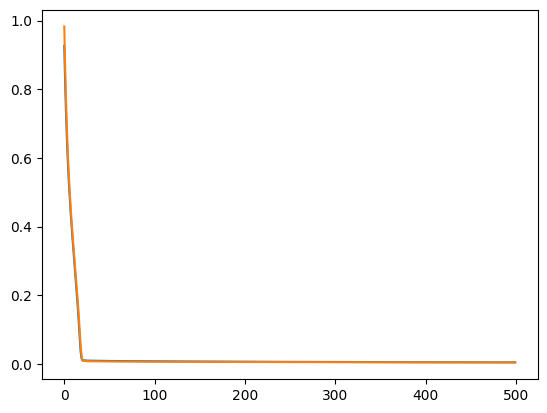

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])